In [41]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpjzew0yrr/pubring.gpg' created
gpg: /tmp/tmpjzew0yrr/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [42]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

/home/zekikus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
input_shape = [None, 32, 32, 3]
number_of_classes = 10

y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

In [4]:
print("Shape of training features: {}".format(x_train.shape))
print("Shape of training lables: {}".format(y_train.shape))
print("Shape of testing features: {}".format(x_test.shape))
print("Shape of testing lables: {}".format(y_test.shape))

Shape of training features: (50000, 32, 32, 3)
Shape of training lables: (50000, 10)
Shape of testing features: (10000, 32, 32, 3)
Shape of testing lables: (10000, 10)


In [5]:
learning_rate = 0.01
epochs = 50
batch_size = 32
num_classes = 10

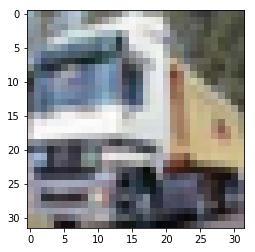

In [6]:
plt.imshow(x_train[1])

In [7]:
x_train, cv_x, y_train, cv_y = train_test_split(x_train, y_train, 
                                                test_size = 5000, random_state = 42)

print("Number of examples in training set: {}".format(x_train.shape[0]))
print("Number of examples in cross validation set: {}".format(cv_x.shape[0]))

Number of examples in training set: 45000
Number of examples in cross validation set: 5000


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # Input Scaling
x_test /= 255

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [12]:
# Adam Optimizer
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [18]:
#Belirlenen parametreler ve eğitim veri seti ile kurulan modelin eğitilmesi
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 45000 samples, validate on 10000 samples
Epoch 1/50
45000/45000 [==============================] - 35s 769us/step - loss: 1.7804 - acc: 0.3493 - val_loss: 1.4932 - val_acc: 0.4621
Epoch 2/50
 7616/45000 [====>.........................] - ETA: 26s - loss: 1.5345 - acc: 0.443945000/45000 [==============================] - 33s 733us/step - loss: 1.4637 - acc: 0.4720 - val_loss: 1.3256 - val_acc: 0.5282
Epoch 3/50
25824/45000 [================>.............] - ETA: 13s - loss: 1.3628 - acc: 0.510345000/45000 [==============================] - 33s 740us/step - loss: 1.3390 - acc: 0.5199 - val_loss: 1.2247 - val_acc: 0.5678
Epoch 4/50
32416/45000 [====================>.........] - ETA: 8s - loss: 1.2529 - acc: 0.554145000/45000 [==============================] - 33s 738us/step - loss: 1.2485 - acc: 0.5554 - val_loss: 1.1682 - val_acc: 0.5859
Epoch 5/50
35296/45000 [======================>.......] - ETA: 6s - loss: 1.1848 - acc: 0.581945000/45000 [==============================] - 33

35648/45000 [======================>.......] - ETA: 6s - loss: 0.4028 - acc: 0.855545000/45000 [==============================] - 33s 734us/step - loss: 0.4043 - acc: 0.8556 - val_loss: 0.6717 - val_acc: 0.7797
Epoch 39/50
36160/45000 [=======================>......] - ETA: 6s - loss: 0.3894 - acc: 0.863045000/45000 [==============================] - 33s 733us/step - loss: 0.3929 - acc: 0.8616 - val_loss: 0.6806 - val_acc: 0.7812
Epoch 40/50
36576/45000 [=======================>......] - ETA: 5s - loss: 0.3868 - acc: 0.862545000/45000 [==============================] - 33s 733us/step - loss: 0.3870 - acc: 0.8618 - val_loss: 0.6831 - val_acc: 0.7775
Epoch 41/50
36768/45000 [=======================>......] - ETA: 5s - loss: 0.3724 - acc: 0.868245000/45000 [==============================] - 33s 734us/step - loss: 0.3747 - acc: 0.8667 - val_loss: 0.6701 - val_acc: 0.7838
Epoch 42/50
36864/45000 [=======================>......] - ETA: 5s - loss: 0.3685 - acc: 0.868345000/45000 [============

In [19]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 196us/step
Test loss: 0.7030400779247284
Test accuracy: 0.7854


In [0]:
# Eğitilen modeli kaydettim.
import sys
model_name = 'cifar10_model.h5'
# Google Colab üzerinden çalıştığım için Google Drive üzerine kaydettim. Bu kısım sizin kaydetmek istediğiniz 
# dosya yolunu temsil etmektedir.
sys.path.insert(0, 'drive/')
model.save('drive/' + model_name)